In [2]:
import numpy as np

In [15]:
dat=np.load('//ZMN-HIVE/User-Data/Maria/segmented/fish20_6dpf_medium_masked_traces.npy')

In [4]:
print(dat.shape)

(37977, 1800)


In [7]:
dat_fft=np.fft.fft(dat).real

In [8]:
from sklearn.decomposition import PCA

pca=PCA(n_components=10)
pcs=pca.fit_transform(dat_fft.T)

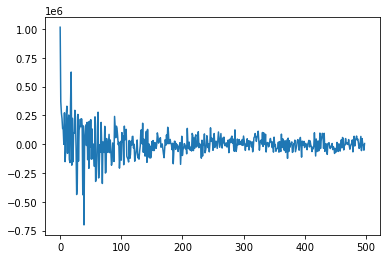

In [11]:
import matplotlib.pyplot as plt
plt.plot(pcs[1:500,1])

In [12]:
pca.explained_variance_ratio_

array([9.94535245e-01, 7.88881237e-04, 7.80960014e-04, 3.65507488e-04,
       2.51403220e-04, 1.36174905e-04, 1.26894769e-04, 1.16911073e-04,
       1.04006971e-04, 9.71917447e-05])

In [48]:
#Regression
rois=np.load('//ZMN-HIVE/User-Data/Maria/segmented/fish20_6dpf_medium_masked_rois.npy')[:,:3]

In [22]:
print(rois.shape)

(37977, 3)


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dat_fft,rois,test_size=0.33, random_state=42)
print(x_train.shape)
print(y_train.shape)
lin=LinearRegression().fit(x_train,y_train)
print(lin.score(x_test,y_test))
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1000.0).fit(x_train,y_train)
print(ridge.score(x_test,y_test))

(25444, 1800)
(25444, 3)
0.4578679160394259
0.4578679240355188


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dat,rois,test_size=0.33, random_state=42)
print(x_train.shape)
print(y_train.shape)
lin=LinearRegression().fit(x_train,y_train)
print(lin.score(x_test,y_test))
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1000.0).fit(x_train,y_train)
print(ridge.score(x_test,y_test))

(25444, 1800)
(25444, 3)
0.5158297146543069
0.5158724720396547
